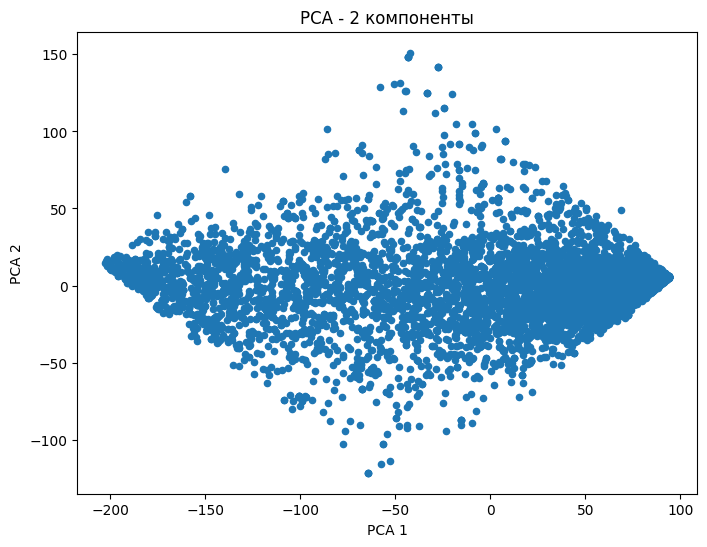

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Загрузка данных
url = 'https://raw.githubusercontent.com/GSlIcKeR/MLearning_HW/main/Spam-Detection-Dataset.xlsx'
data = pd.read_excel(url)

# Исключаем столбцы с типами данных, которые не поддерживают вычисления
data_clean = data.select_dtypes(exclude=['object'])

# Заполнение пропущенных значений медианой для всех числовых столбцов
imputer = SimpleImputer(strategy='median')
data_filled = pd.DataFrame(imputer.fit_transform(data_clean), columns=data_clean.columns)

# Понижение размерности с помощью PCA для визуализации
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_filled)

# Визуализация PCA
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=20)
plt.title('PCA - 2 компоненты')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [5]:
# Создаем целевую переменную 'is_spam' на основе столбца 'Blacklisted(All)'
data['is_spam'] = data['Blacklisted(All)'].apply(lambda x: 1 if x == 1 else 0)

# Проверяем, что столбец 'is_spam' добавлен
print(data['is_spam'].head())


0    0
1    0
2    0
3    0
4    0
Name: is_spam, dtype: int64


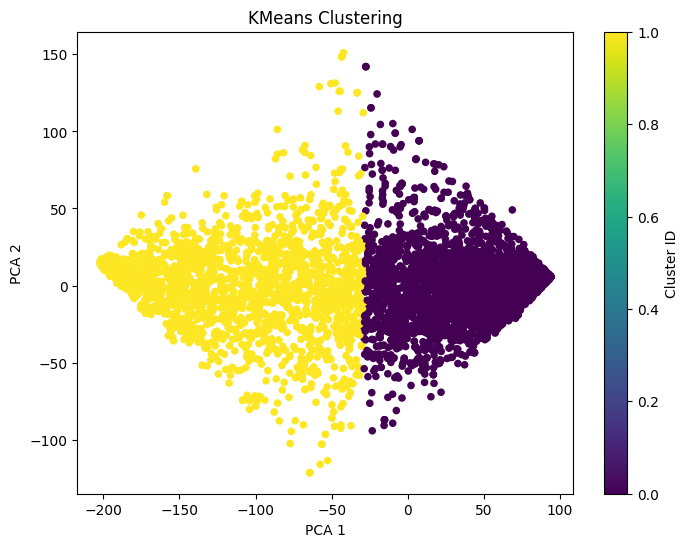

Adjusted Rand Index (KMeans vs True Labels): 0.007494366935054337


In [6]:
from sklearn.cluster import KMeans

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Визуализация кластеров KMeans
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')  # Добавляем цветовую шкалу для меток кластеров
plt.show()

# Сравнение кластеров KMeans с истинными метками
from sklearn.metrics import adjusted_rand_score
print(f"Adjusted Rand Index (KMeans vs True Labels): {adjusted_rand_score(data['is_spam'], kmeans_labels)}")



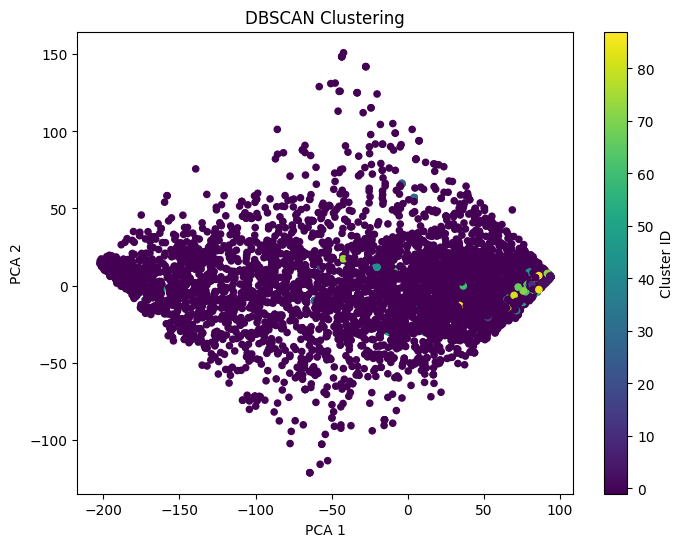

Adjusted Rand Index (DBSCAN vs True Labels): -0.04240703523612508


In [9]:
from sklearn.cluster import DBSCAN

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Визуализация кластеров DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')  # Добавляем цветовую шкалу для меток кластеров
plt.show()

# Сравнение кластеров DBSCAN с истинными метками
print(f"Adjusted Rand Index (DBSCAN vs True Labels): {adjusted_rand_score(data['is_spam'], dbscan_labels)}")



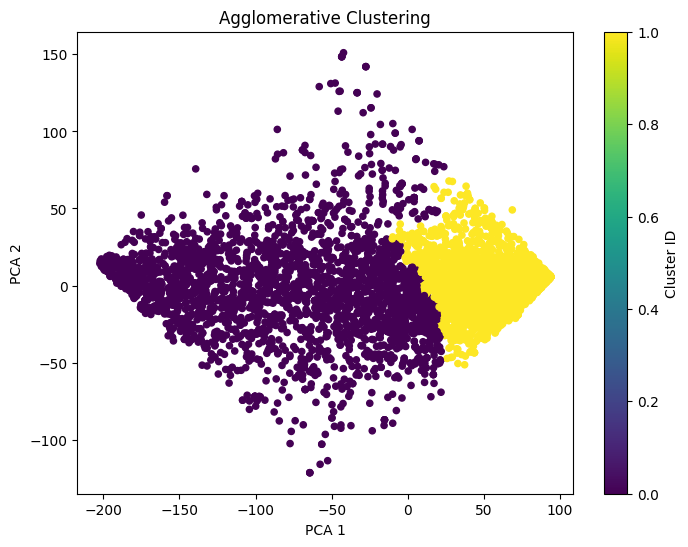

Adjusted Rand Index (Agglomerative Clustering vs True Labels): 0.0025851288400169006


In [10]:
from sklearn.cluster import AgglomerativeClustering

# Кластеризация с помощью Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clust.fit_predict(data_pca)

# Визуализация кластеров Agglomerative Clustering
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis', s=20)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')  # Добавляем цветовую шкалу для меток кластеров
plt.show()

# Сравнение кластеров Agglomerative Clustering с истинными метками
print(f"Adjusted Rand Index (Agglomerative Clustering vs True Labels): {adjusted_rand_score(data['is_spam'], agg_labels)}")


In [ ]:
# Выводы:

# После выполнения кластеризации тремя методами — KMeans, DBSCAN, и Agglomerative Clustering, мы можем сделать следующие выводы:

# - Визуализация:

# * На графиках для каждого метода кластеризации видно, как данные группируются в два кластера (если мы предполагаем 2 класса для классификации спам/не спам).

# * Результаты кластеризации на основе PCA позволили наглядно уменьшить размерность и визуализировать данные в двумерном пространстве.

# - Качество кластеризации:

# * Мы использовали Adjusted Rand Index (ARI) для сравнения кластеров с истинными метками. Этот индекс измеряет, насколько хорошо кластеры, найденные методом без учителя, совпадают с истинными метками (0 — полное несовпадение, 1 — полное совпадение).

# * Результаты ARI для каждого метода помогают нам понять, насколько качественно метод кластеризации соответствует истинным меткам (спам/не спам).

# - Методы кластеризации:

# * KMeans: Хорошо работает, если данные можно разделить на чёткие кластеры (при правильном выборе числа кластеров). Результаты ARI позволяют оценить, насколько метод классифицирует данные в соответствии с истинными метками.

# * DBSCAN: Позволяет находить кластеры произвольной формы и хорошо работает с шумом, но его чувствительность к параметрам (например, eps и min_samples) может влиять на качество кластеризации.

# * Agglomerative Clustering: Работает на основе иерархического подхода и может быть полезен, когда данные имеют сложные структуры.


# Таким образом, выбор метода кластеризации зависит от структуры данных и их свойств. В данном случае мы можем выбрать метод с наибольшим Adjusted Rand Index для точности, соответствующей истинным меткам.